# Here is where we will have our code for the Final Project itself. 

## Table of Contents

This cells serves as an outline of what we can do for this project. It is based on A4.

### Part 1: Load and Clean the Data

### Part 2: Exploratory Data Visualization
This part depends on the features of our dataset. Since our hypothesis focuses on console and year, we can plot distributions of this against global and/or regional sales.

### Part 3: Exploring the Data
In this part, we will figure out basic properties of the data. We can look at the different statistical properties of the different features in the dataset. 

### Part 4: Testing Distributions
#### 4A) Determining Normality

### Part 5: Data Analysis
We proposed that we would use Multiple Linear Regression to determine the p-values of the features we are interested in, and then compare this to an alpha level of 0.001 (?). We will also use an ANOVA Test (a statistical test to figure out the differences among group means in a sample) on the categorical features of interest.

Afterwards, we could explore some more, and determine if there are any confounding variables.


### Part 6: Conclusions and Summary

### Some extra stuff we CAN do (if time permits)
We could use clustering to determine distinct clusters of the video games below. Suppose we find a cluster that achieves a relatively high number of sales. This can then lead us to believe that video games with the properties defined by that cluster are the properties that strongly correlate with increased video game sales.

### Research Question: 
What factors lead to the greatest accumulation of global video game sales from 1980-2017?
### Hypothesis: 
We believe that the **console itself has the most impact on video game sales**, whereas **year released is the least impactful**. Consoles will have the most impact on video game sales because of affordability, customer brand loyalty, and the notion that people who grow up with one console only tend to buy games compatible with that console only. The year the game was released would be least impactful because each year, a number of factors can change sales, and so the year released would be confounded with these various factors.

## Import necessary packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as stats

## Part 1: Loading in the Data

In [2]:
df = pd.read_csv('vgsalesGlobale.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
print('No. rows: ', df.shape[0])
print('No. cols: ', df.shape[1])

No. rows:  16598
No. cols:  11


### Finding and Cleaning Missing Data

In [5]:
# Get the number of observations that are missing data for each column
no_missing = df.isnull().sum()
percent_missing = no_missing / df.shape[0]
missing_data_df = pd.DataFrame([no_missing, percent_missing]).T
missing_data_df.columns = ['No. Missing', 'Percentage Missing']

In [6]:
missing_data_df

,No. Missing,Percentage Missing
Rank,0.0,0.000000
Name,0.0,0.000000
Platform,0.0,0.000000
Year,271.0,0.016327
Genre,0.0,0.000000
Publisher,58.0,0.003494
NA_Sales,0.0,0.000000
EU_Sales,0.0,0.000000
JP_Sales,0.0,0.000000
Other_Sales,0.0,0.000000


Above is a dataframe showing the number of missing data for each column, along with the percentage of the data that they make up. Below, we extract these rows and place them into `missing_rows`.

In [7]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


`missing_rows` contains all of the rows that contain at least one missing value. Of all of the features in our data, only `Year` and `Publisher` are missing. 

In [8]:
print('Proportion of total data that has at least one missing value: ', len(missing_rows) / df.shape[0])

Proportion of total data that has at least one missing value:  0.018496204361971323


As you can see, the proportion of our data where there is at least one missing value takes on a very small amount: < 2%.
Given that such a small percentage of our data is missing values, we have decided that it would be quicker and easier to simply drop these rows.

In [9]:
df.dropna(inplace=True)

In [10]:
print('New amount of rows: ', df.shape[0])
print('New amount of cols: ', df.shape[1])
df.describe()

New amount of rows:  16291
New amount of cols:  11


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Using `df.describe()`, we can see a quick summary of our dataset. 

Here are some interesting things to note from the summary:

- The maximum `Year` is 2020, which is obviously wrong, since the current year is 2019. Below, we look more into the row(s) with this `Year`.
- The minimum `NA_Sales`, `ED_Sales`, `JP_Sales`, and `Other_Sales` is 0.0. These `Sales` are measured in the millions, so a value of 0.0 would mean that the game sold less than a million copies. However, it could also mean that the game was not sold in that particular region. Since we are only interested in global video game sales, however, we will not have to worry about this insight. 
- The `Rank` of each game is unique. That means there are 16,291 unique ranks. These ranks result from the game's `Global_Sales`, which is the feature we are trying to predict/ make models from. So, we should ignore this feature. Below, we drop the `Rank` feature.
- `Global_Sales` are extremely skewed towards larger values, as one can see with the large difference between the mean and the median of this feature. As such, using the mean as a measure of the average value will also be skewed. So, it would be safer to use the median.

In [11]:
df.drop(columns=['Rank'], inplace=True)

Let's look at the game made in `2020`.

In [12]:
df.loc[df['Year'] == 2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


Since it is only one row, simply Googling this can help us fix the `Year`. After a quick search, the correct `Year` is: 2009.

In [13]:
df.loc[df['Year'] == 2020, 'Year'] = 2009
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.404886,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.831475,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Standardizing and Transforming the Data

We will go feature by feature, starting with `Year`. We look at the different distributions of each, and from there determine how we can standardize the data

#### Standardizing Year

Each of the `Years` are coded for correctly in our data set. All rows have the proper format, where each `Year` value is an integer ranging from 1980 to 2017. 

In [14]:
df['Year'].value_counts()

2009.0    1432
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
Name: Year, dtype: int64

#### Standardizing Platform

Each of the `Platforms` follow a format specified by the web scraper used to get this data. Looking at the unique values in this column, there does not appear to be any unusual values. 

In [15]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

#### Standardizing Genre

There seem to be no abnormal genres in the `Genre` feature. The web scraper seemed to do a good job in scraping the genre's for each game, and as such we do not need to standardize this feature.

In [16]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

#### Standardizing Publisher

There seem to be many different video game publishers in this data set. However, each seems to be formatted similarly, and as such no standardizing is needed. We will go more in-depth into this feature to determine outliers in the Exploratory Data Analysis section.

In [17]:
df['Publisher'].value_counts()

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

#### Standardizing Sales

Since all of the sales are encoded as integers, there is no need to standardize these columns.

In [18]:
print('Type of NA_Sales: ', df['NA_Sales'].dtypes)
print('Type of EU_Sales: ', df['EU_Sales'].dtypes)
print('Type of JP_Sales: ', df['JP_Sales'].dtypes)
print('Type of Other_Sales: ', df['Other_Sales'].dtypes)
print('Type of Global_Sales: ', df['Global_Sales'].dtypes)

Type of NA_Sales:  float64
Type of EU_Sales:  float64
Type of JP_Sales:  float64
Type of Other_Sales:  float64
Type of Global_Sales:  float64


## Part 2: Exploratory Data Analysis

There are a number of different ways to explore this data. Since most of our data are categorical variables, we will use a bar graph of the feature against `Global_Sales`. `Year` will be interpreted as a categorical variable since `Years` only take on discrete values ie. there is not Year 2012.5. We will exclude `Name` since it will not give any helpful information in determining `Global_Sales` unlike the other features. 

We will then explore `Platform` and `Year`, since these are our features of interest in determining the factors that impact `Global_Sales`.  

In [19]:
def plot_bar_graph_value_counts(feature, title, xlabel, ylabel, width, height):
    """
    Plots a bar graph of the given feature, with the given title and labels, using the unique counts in the given feature. 
    
    Parameters:
    -----------
    feature - The data to graph
    title - The title of the graph
    xlabel - The label to give to the x-axis
    ylabel - The label to give to the y-axis
    width - The width of this chart
    height - The height of this chart
    
    Return:
    None
    """
    plt.title(title, fontsize=25)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    feature_counts = feature.value_counts()
    feature_counts.plot.bar(figsize=(width, height))

def get_sales(feature, condition, median):
    """
    Retrieves the accumulative Global_Sales of the given feature with the given condition.
    If the median flag is set to True, then it will instead return the median.
    
    Parameters:
    -----------
    feature - The feature to look through
    condition - The condition to parse feature for
    median - Flag determining whether to return the median
    
    Return:
    -------
    The accumulative Global_Sales of the given feature with the given condition.
    If the median flag is true, then it will instead return the median.
    """
    target_rows = df.loc[df[feature] == condition]
    if median:
        return np.median(target_rows['Global_Sales'])
    return np.sum(target_rows['Global_Sales'])

def plot_bar_graph(feature, uniques, ascending, median, title, xlabel, ylabel, width, height):
    """
    First, this creates a DataFrame using the given feature and uniques and then rearranges the data 
    depending on the ascending flag. Afterwards, this will plot a bar graph of the created DataFrame.
    
    Parameters:
    -----------
    feature - The feature to focus on
    uniques - List to loop through; will act as the conditions for the getting sales
    ascending - Flag on whether or not to rearrange the data in ascending order
    median - Flag on whether or not to calculate the median
    title - The title of the bar graph
    xlabel - The xlabel of the bar graph
    ylabel - The ylabel of the bar graph
    width - The width of the chart
    height - The height of the chart
    
    Return:
    -------
    None
    """
    sales = []
    
    for unique in uniques: # Loop through and get the global sales for each unique value
        sales.append(get_sales(feature, unique, median))
    
    if median: # Change column name depending on if a median was wanted or not
        sales_col = 'Median_Global_Sales'
    else:
        sales_col = 'Acc_Global_Sales'

    # Create a new DataFrame with each unique PLatform and global sales
    sales_df = pd.DataFrame({
        feature: uniques,
        sales_col: sales
    })
    
    sales_df.sort_values(sales_col, ascending=ascending, inplace=True) # Sort global sales
    
    sales_df.set_index(feature, inplace=True)
    
    # Plot
    ax = sales_df.plot.bar(figsize=(15, 10))
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_title(title, fontsize=25)

### Exploring Platform

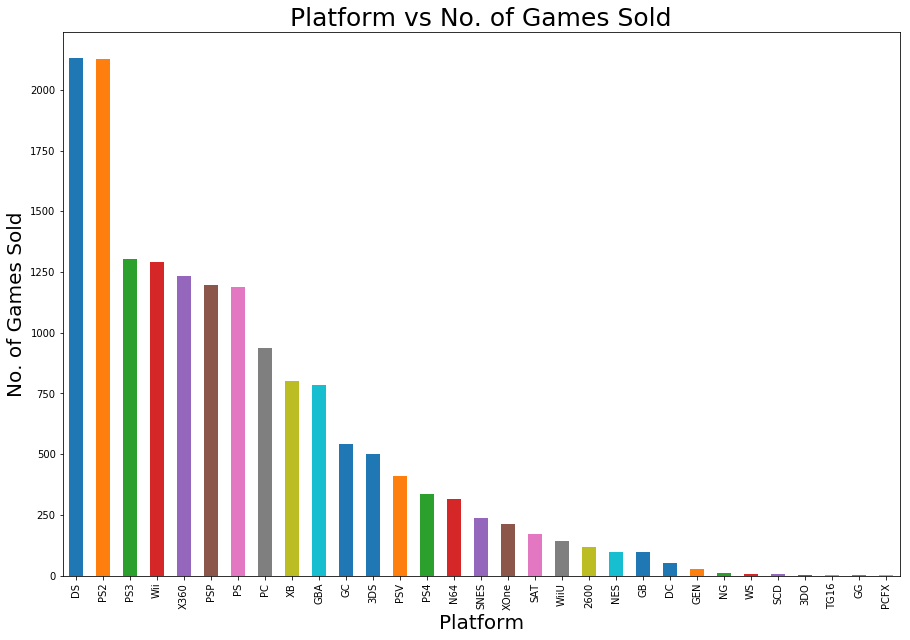

In [20]:
plot_bar_graph_value_counts(df['Platform'], 'Platform vs No. of Games Sold', 'Platform', 'No. of Games Sold', 15, 10)

From this chart, we can see that the most used `Platform` used throughout this period of time was the DS. The [Nintendo DS](https://en.wikipedia.org/wiki/Nintendo_DS) was a popular hand-held game console, and given its popularity, it would make sense that many companies would try to publish their game on this platform. Coming at an extremely close second place was the [Playstation 2](https://en.wikipedia.org/wiki/PlayStation_2), which, despite being a home game console, earned almost as much in sales as the the DS. On the opposite end of this chart we see the [PCFX](https://en.wikipedia.org/wiki/PC-FX), an obscure 1994 video game console released solely in Japan. Due to its regional exclusivity, it would make sense that many games did not use it as a target platform.

Let's also look instead at the `Global_Sales` and median `Global_Sales` for each `Platform`.  

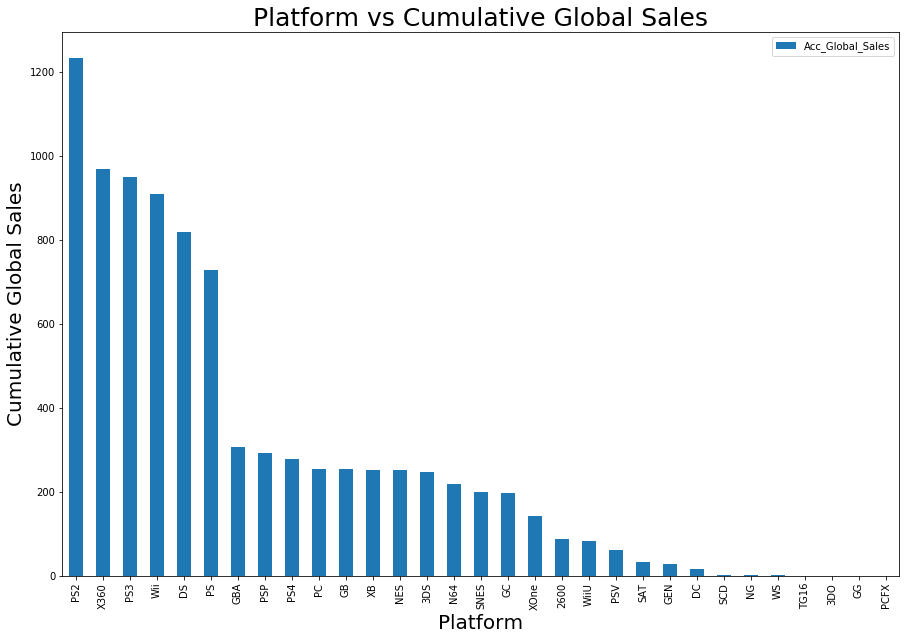

In [21]:
unique_platforms = df['Platform'].unique() # Get all unique values for Platform

plot_bar_graph('Platform', unique_platforms, False, False, 
               'Platform vs Cumulative Global Sales', 'Platform', 'Cumulative Global Sales', 15, 10)

Again, we see the PS2 as a top contender in this bar chart. During this 37-year time span, many of the games that were made for the PS2 sold many copies, as reflected by the large amount of `Global_Sales`. The DS, however, is lower than expected on this bar chart. Though many of the games in the dataset were designed for the DS, those games were not very successful. In fact, the DS is now beat by three other platforms: the [Xbox 360](https://en.wikipedia.org/wiki/Xbox_360), the [Playstation 3](https://en.wikipedia.org/wiki/PlayStation_3), and the [Wii](https://en.wikipedia.org/wiki/Wii). So, it would seem that the number of games built for a particular system does not necessarily mean that it would accumulate more global sales.

When we begin to examine the median sales, we will also see that a higher accumulation of global sales does not mean that each game typically does well. 

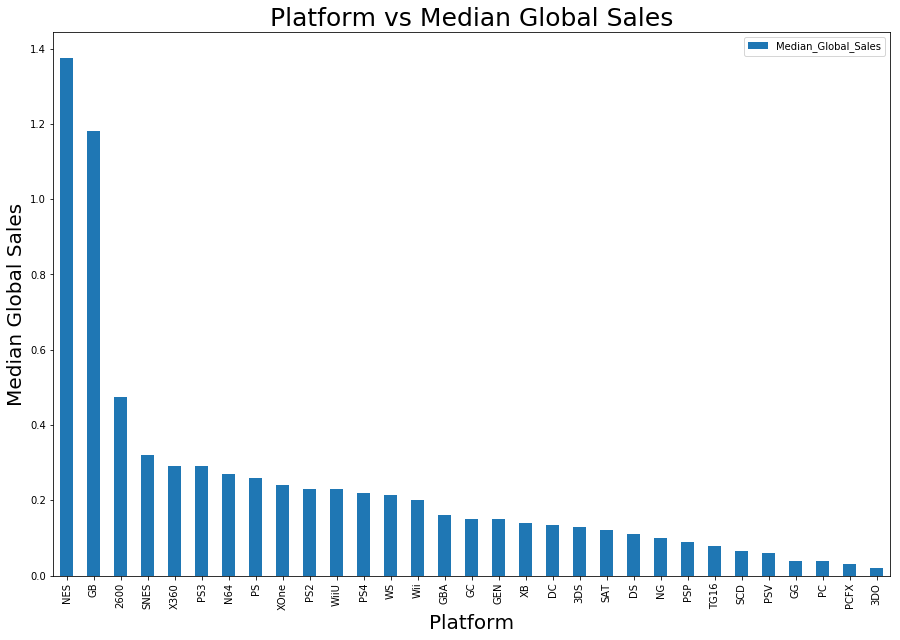

In [22]:
median_sales_by_platform = []

plot_bar_graph('Platform', unique_platforms, False, True, 
               'Platform vs Median Global Sales', 'Platform', 'Median Global Sales', 15, 10)

Here we can see many differences between the first bar chart and the second. For instance, the [NES](https://en.wikipedia.org/wiki/Nintendo_Entertainment_System) has the greatest median `Global_Sales`, which means that 50% of the dataset had global sales falling below and above about 1.4 million. This is surprising, considering that in the first bar chart above, the NES was used in less than 200,000 of the games used in the dataset, yet for each of these games, the `Global_Sales` would be about 1.4 million, suggesting that many of these games were popular. 

The DS and PS2, which were the top two in terms of the amount of games that were released on that respective system, had a median of less than 0.4 million in `Global_Sales` (it was even less for the DS, which was about 0.15 million). For the PS2, though it had the highest accumulation of global sales, it had a median global sales value of less than 0.4 million. This suggests that there were huge hits for the PS2, but a majority of those games were not as successful. 

After analyzing `Platform`, we can see that the number of games designed for a platform does not necessarily mean a greater accumulation of `Global_Sales`, nor does a greater accumulation in `Global_Sales` guarantee that each game was a hit.

### Exploring Year


Text(0, 0.5, 'No. of Games')

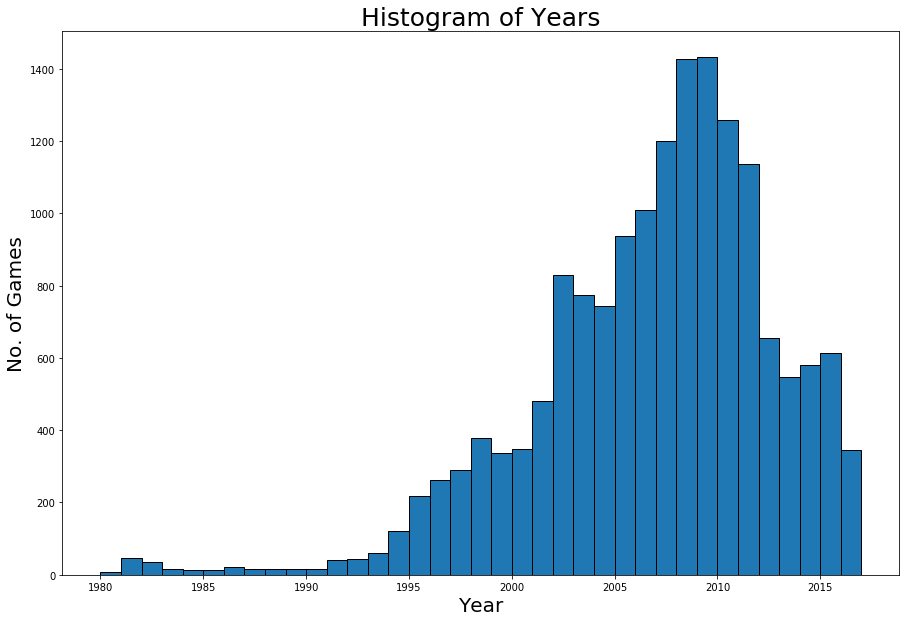

In [23]:
year_range = np.max(df['Year']) - np.min(df['Year'])
n_bins = int(year_range / 1) # Get bins that are 1 year in length

plt.figure(figsize=(15, 10))
plt.hist(tuple(df['Year']), bins=n_bins, edgecolor='black')
plt.title('Histogram of Years', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('No. of Games', fontsize=20)

Here we see that this distribution is skewed to the right, with most of our games being released between about 2004 to 2011.

We will now look at the accumulative `Global_Sales` for every year.

In [24]:
unique_years = np.sort(df['Year'].unique())
sales_year = []

for year in unique_years:
    sales_year.append(get_sales('Year', year, False))

sales_year_df = pd.DataFrame({
    'Year': unique_years,
    'Acc_Global_Sales': sales_year
})

sales_year_df.set_index('Year', inplace=True)

Text(0, 0.5, 'Cumulative Global Sales')

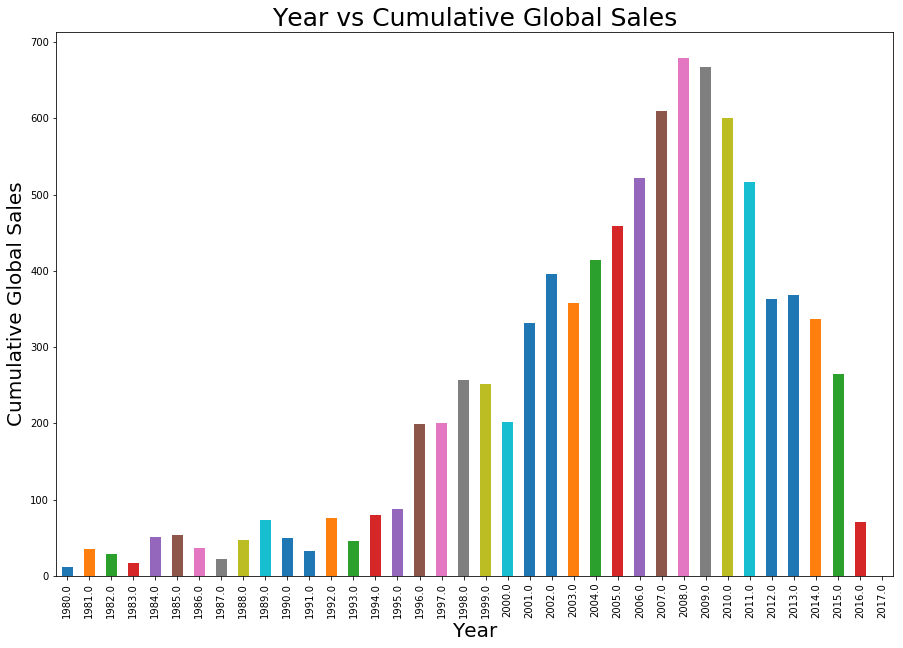

In [25]:
ax = sales_year_df['Acc_Global_Sales'].plot.bar(figsize=(15, 10))
ax.set_title('Year vs Cumulative Global Sales', fontsize=25)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Cumulative Global Sales', fontsize=20)

In this chart, we see that games released around 2006 to 2010 accumulated a greater amount of sales globally during the 37-year time span. These games were more recent, but despite their 'age', they were still able to achieve a huge amount of sales. It would seem that games were becoming more widespread after the 2000s, and as their popularity increased so too did sales.  

In [26]:
median_sales_year = []

for year in unique_years:
    median_sales_year.append(get_sales('Year', year, True))

sales_year_df['Median_Global_Sales'] = median_sales_year
sales_year_df

,Acc_Global_Sales,Median_Global_Sales
Year,,
1980.0,11.38,0.770
1981.0,35.77,0.465
1982.0,28.86,0.540
1983.0,16.79,0.770
1984.0,50.36,1.485
1985.0,53.94,1.015
1986.0,37.07,1.360
1987.0,21.74,0.885
1988.0,47.22,1.510


Text(0, 0.5, 'Median Global Sales')

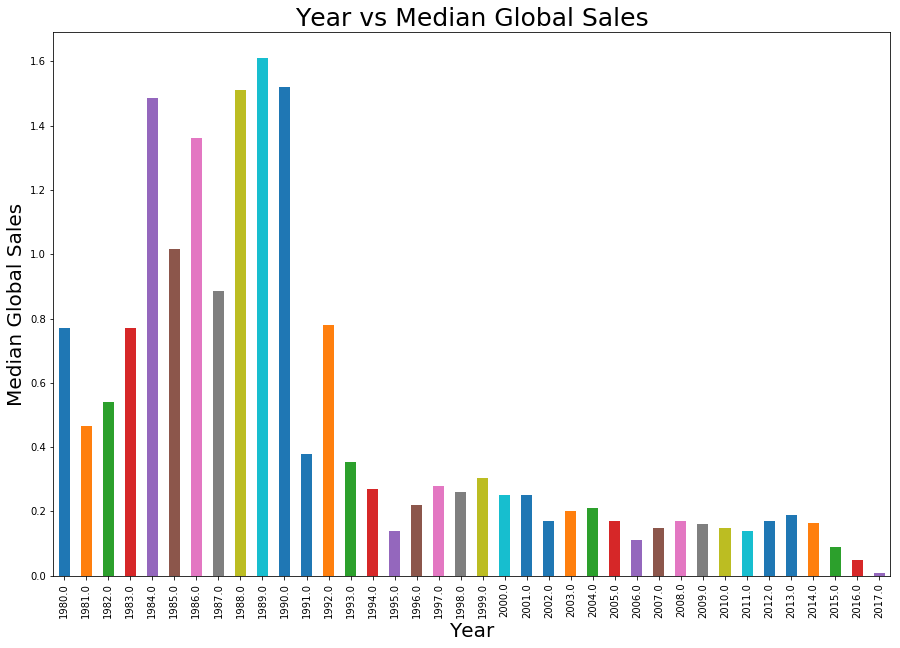

In [27]:
ax = sales_year_df['Median_Global_Sales'].plot.bar(figsize=(15, 10))
ax.set_title('Year vs Median Global Sales', fontsize=25)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Median Global Sales', fontsize=20)

In this chart, however, we see that the median `Global_Sales` earned for each game after the 2000s is relatively low. In fact, half of the games released in the earlier years (particularly from 1988-1990) had a `Global_Sales` value of more than 1.4 million. This means that many of these games sold around 1.4 million copies, whereas in the 2000s and above, many games sold a little less than 0.2 million copies. It would seem that the surge in the popularity of video games does not necessarily mean each game would be successful. 

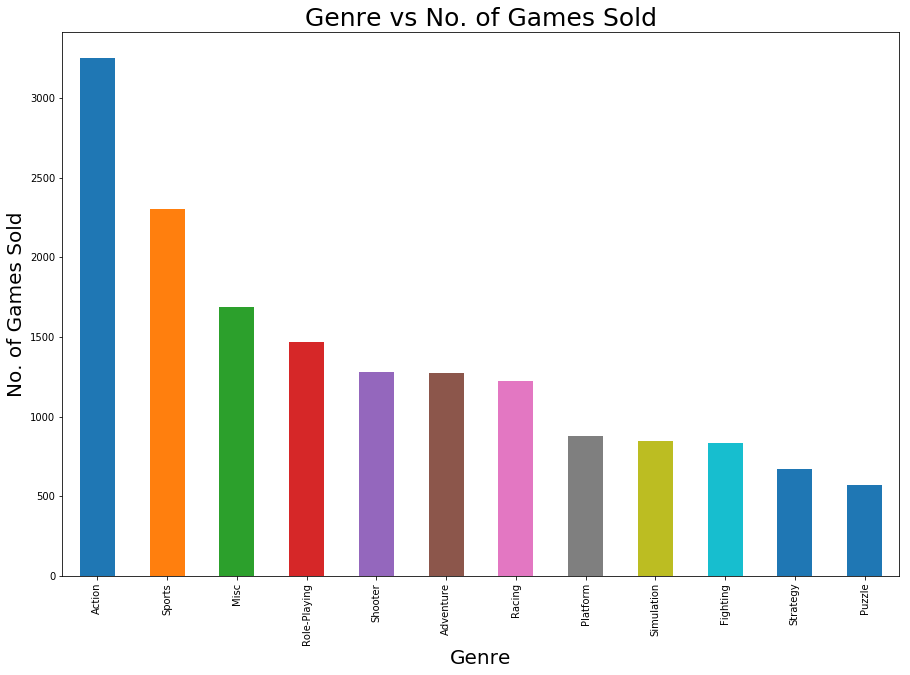

In [28]:
plot_bar_graph_value_counts(df['Genre'], 'Genre vs No. of Games Sold', 'Genre', 'No. of Games Sold', 15, 10)

From the above, we can see that Action games were the most popular in our data set. Let's also look at the cumulative `Global_Sales` and median `Global_Sales`, as well as the regional sales.

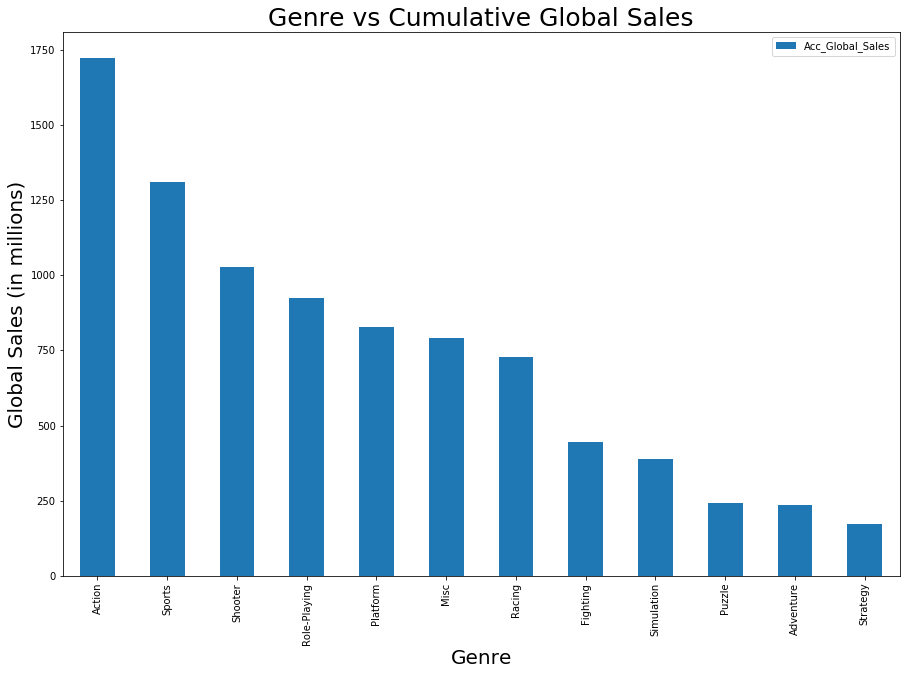

In [29]:
unique_genres = np.sort(df['Genre'].unique())

plot_bar_graph('Genre', unique_genres, False, False, 'Genre vs Cumulative Global Sales', 
               'Genre', 'Global Sales (in millions)', 15, 10)

In this chart, we see that, again, Action games accrued the most `Global_Sales` at the end of the 37-year span. We can look at the distribution of this amongst regions more in-depth as well.

In [30]:
# NA_Sales
na_sales = []
for genre in unique_genres:
    rows = df[df['Genre'] == genre]
    na_sales.append(np.sum(rows['NA_Sales']))

# EU_Sales
eu_sales = []
for genre in unique_genres:
    rows = df[df['Genre'] == genre]
    eu_sales.append(np.sum(rows['EU_Sales']))

# JP_Sales
jp_sales = []
for genre in unique_genres:
    rows = df[df['Genre'] == genre]
    jp_sales.append(np.sum(rows['JP_Sales']))

# Other_Sales
other_sales = []
for genre in unique_genres:
    rows = df[df['Genre'] == genre]
    other_sales.append(np.sum(rows['Other_Sales']))


genres_df = pd.DataFrame({
    'Genre': unique_genres,
    'NA_Sales': na_sales,
    'EU_Sales': eu_sales,
    'JP_Sales': jp_sales,
    'Other_Sales': other_sales,
})

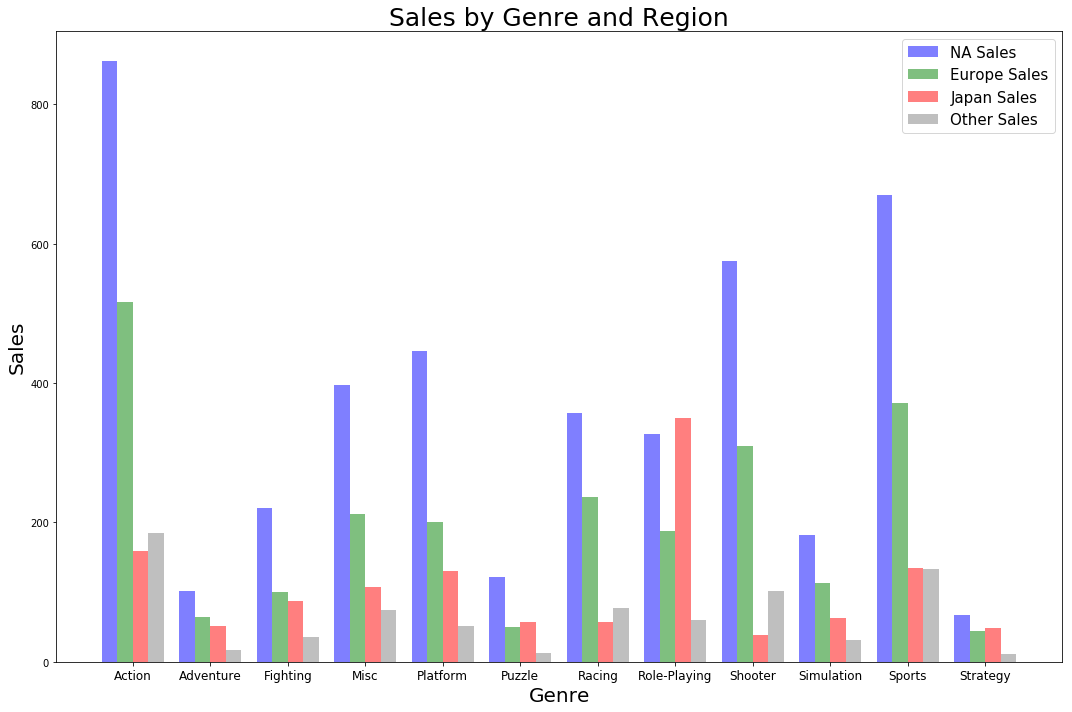

In [31]:
n_genres = len(unique_genres)
indices = np.arange(n_genres)
width = 0.20
opacity = 0.50

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(indices, genres_df['NA_Sales'], width, label='NA Sales', color='b', alpha=opacity)
rects2 = ax.bar(indices+width, genres_df['EU_Sales'], width, label='Europe Sales', color='g', alpha=opacity)
rects3 = ax.bar(indices+ 2 * width, genres_df['JP_Sales'], width, label='Japan Sales', color='r', alpha=opacity)
rects3 = ax.bar(indices+ 3 * width, genres_df['Other_Sales'], width, label='Other Sales', color='gray', alpha=opacity)

ax.set_title('Sales by Genre and Region', fontsize=25)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Sales', fontsize=20)
ax.set_xticks(indices + width + (width / 2))
ax.set_xticklabels(genres_df['Genre'], fontsize=12)
ax.legend(prop={'size': 15})

fig.tight_layout()

Most copies sold in North America, and the `Genre` that obtained the greatest amount of sales across all three regions was Action. The most unpopular was Strategy. Something interesting to note is that North America achieved the greatest amount of sales across all regions for most of these Genres, except Role-Playing games. In Japan, Role-Playing games are extremely popular, as shown in the above bar chart.

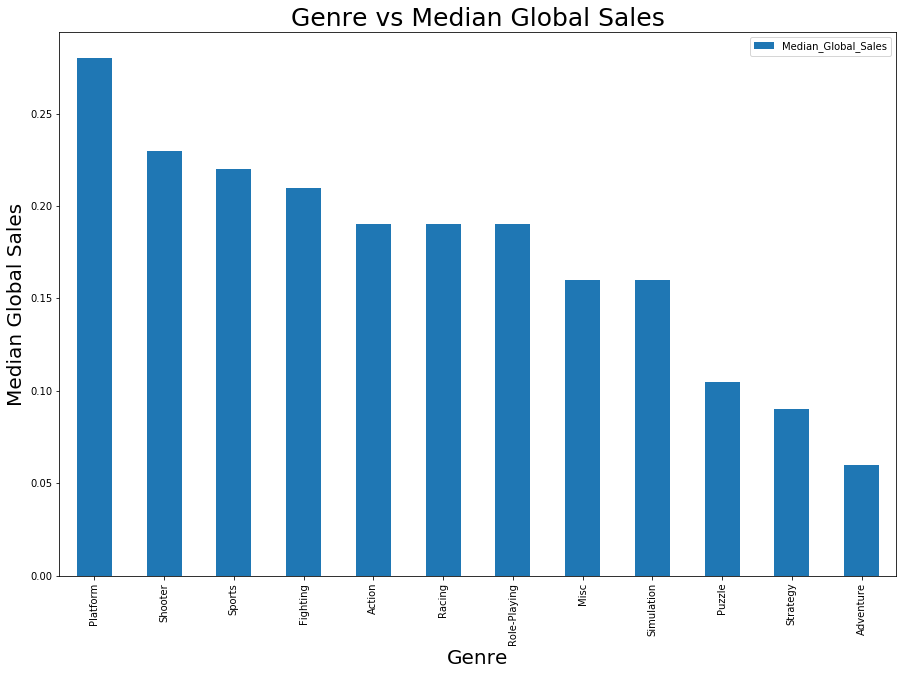

In [32]:
plot_bar_graph('Genre', unique_genres, False, True, 'Genre vs Median Global Sales', 
               'Genre', 'Median Global Sales', 15, 10)

However, in this chart, we see that individual Platform games were more popular than Adventure games. A Platform game during this period would sell more than 0.25 millon copies, as opposed to Action games that could sell about 0.2 million copies.  

## Part 3: Exploratory Data Analysis

Here we look at the trends over time to see how the number of games released compares to sales in a given year. We do this by first checking normality of the distribution of both games released and sales over time, then normalizing the distributions in order to better compare the two. We use an alpha value of 0.01 in order to lower the chance of false positives, as opposed to the commonly used value of 0.05. 
The normalization of the distributions is because they have different ranges, so normalizing the data will give an accurate comparison. We see from the p values printed below that the data can safely be assumed to be normally distributed.

In [77]:
#Group the entries by year, and find how many entries(releases) there are
temp1 = df.groupby(['Year']).count()
temp1 = temp1.reset_index()

#Find the total number of releases in a year.
temp2 = df.groupby(['Year']).sum()
temp2 = temp2.reset_index()

#Normalize the data to compare the shapes of both graphs, since they have different ranges
norm_df = pd.DataFrame()
norm_df['release_count'] = temp1['Name']
norm_df['global_sales'] = temp2['Global_Sales']

#Check if data is normal
norm_df_sales = norm_df.drop('release_count', axis = 1)
normtest = stats.normaltest(norm_df_sales)
p_co=normtest[1]
print("p value for game release distribution", p_co)
norm_df_releases = norm_df.drop('global_sales', axis = 1)
normtest1=stats.normaltest(norm_df_releases)
p_cs = normtest1[1]
print("p value for global sales distribution", p_cs)

norm_df = (norm_df - norm_df.mean()) / norm_df.std()
norm_df['year'] = temp1['Year']


p value for game release distribution [0.08820094]
p value for global sales distribution [0.07719777]


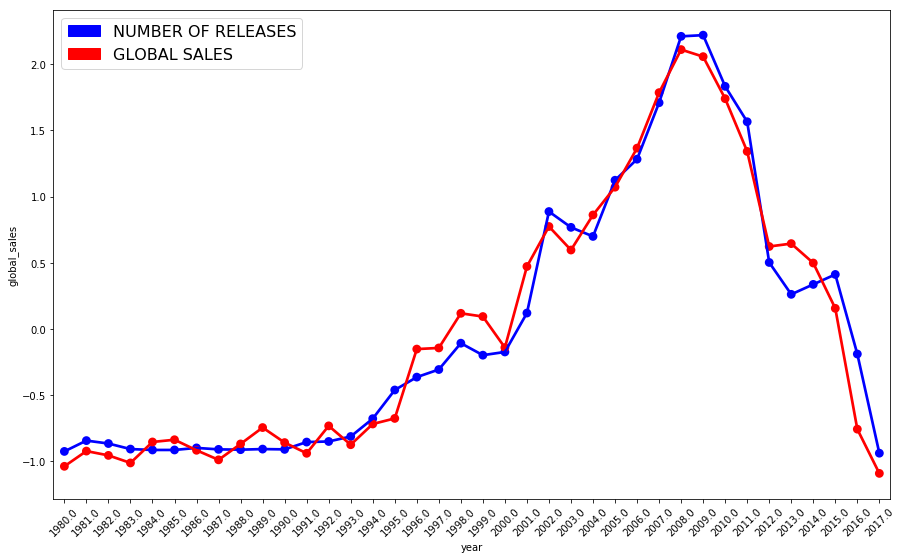

In [78]:
#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = norm_df.year, y = norm_df.release_count, color = 'blue', label='Release Count')
ax = sns.pointplot(x = norm_df.year, y = norm_df.global_sales, color = 'red', label='Global Sales')

blue_patch = mpatches.Patch(color='blue', label='NUMBER OF RELEASES')
red_patch = mpatches.Patch(color='red', label='GLOBAL SALES')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);


We see here that the graphs roughly follow each other, although the graph of game releases is smoother than that of sales. This indicates that it would be more difficult for a predictive model for sales to be written.

Now we look at genre trends over the years with regards to sales. The first graph below is an area plot by percentage, which is the percentage of video game sales a given genre accounted for in a year. The second graph plots the number of sales each genre had in a year.

<Figure size 720x576 with 0 Axes>

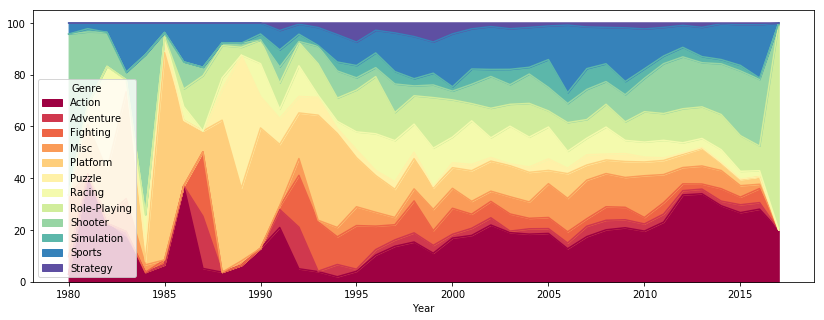

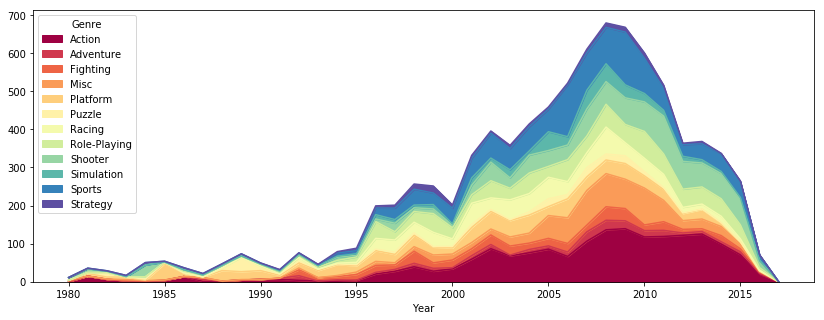

In [88]:
fig = plt.figure(figsize=(10, 8))

genre_sales_percent_by_year = (df.groupby(['Year', 'Genre']).Global_Sales.sum())*(100)/df.groupby(['Year']).Global_Sales.sum()
genre_sales_percent_by_year.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(14, 5))

yearlySales = df.groupby(['Year','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(14, 5) ) ;

Some notable things from the above graphs are that game sales peaked around 2008 and 2009, and that action game sales remained fairly constant even as other genre sales dropped fairly sharply between 2010-2011, and again after 2014.

Now we look at the trends within popular platforms over the years - We find the platform with the most sales in a given year and plot it to see how the most popular gaming platform at the time relates to sales.

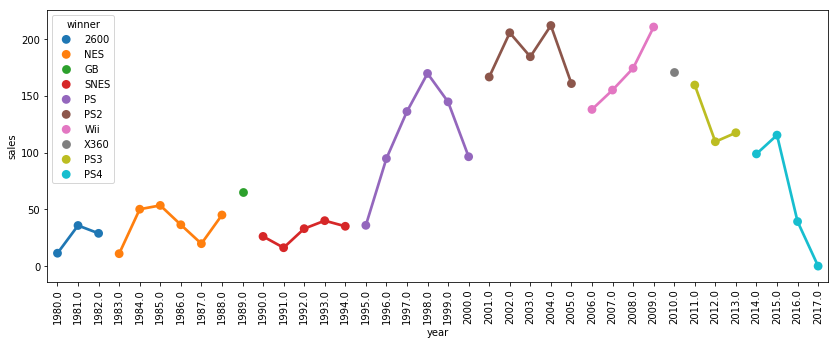

In [89]:
#temp_df takes the sum of all variables for a given platform by year
temp_df = df.groupby(['Year', 'Platform']).sum().reset_index().groupby('Year')

platform_year_max_df = pd.DataFrame()

for year, group in temp_df:
    curr_year = temp_df.get_group(year)
    curr_year_max_sales = 0.0
    curr_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in curr_year.iterrows():
        if platform_data.Global_Sales > curr_year_max_sales:
            curr_year_max_sales = platform_data.Global_Sales
            curr_year_winner = platform_data.Platform
    
    row['year'] = year
    row['winner'] = curr_year_winner
    row['sales'] = curr_year_max_sales
    platform_year_max_df = platform_year_max_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(14, 5))

g = sns.pointplot(x = platform_year_max_df.year ,
              y = platform_year_max_df.sales , 
              hue = platform_year_max_df.winner);

g.set_xticklabels(g.get_xticklabels(), rotation=90);

WIP: Plotting platform sales against years

In [95]:
#fig = plt.figure(figsize=(10, 8))

#platform_sales_percent_by_year = (df.groupby(['Year', 'Platform']).Platform.sum())*(100)/df.groupby(['Year']).Platform.sum()
#platform_sales_percent_by_year.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(14, 5))
#yearlySales_platform=df.drop(df[df.Platform < 20])
#yearlySales_platform = yearlySales_platform.groupby(['Year','Platform']).Global_Sales.sum()

#yearlySales_platform.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(14, 5) ) ;

WIP: Looking at region-trending games, whether sales trends are consistent between regions, or if certain regions prefer particular genres

In [ ]:
#Placeholder cell for above